In [1]:
!pip install -i https://test.pypi.org/simple/ datret

import numpy as np 
import pandas as pd

from datret.datret import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, accuracy_score, f1_score, precision_score, recall_score


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Looking in indexes: https://test.pypi.org/simple/
/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
dataFrameRocAuc = pd.DataFrame(index = [  
                      'RandomForest', 
                      'CatBoost', 
                      'DatRet',  
                      ], columns = ['10%', '20%', '30%', '40%', '50%', '60%'])
dataFrameRocAuc

,10%,20%,30%,40%,50%,60%
RandomForest,NaN,NaN,NaN,NaN,NaN,NaN
CatBoost,NaN,NaN,NaN,NaN,NaN,NaN
DatRet,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["Outcome"], axis=1), data["Outcome"],
                                                random_state=10, test_size=i)
    #RandomForest
    RF = RandomForestClassifier(random_state=0)
    RF.fit(X_train, y_train)
    RF_pred = RF.predict_proba(X_test)
    dataFrameRocAuc.loc['RandomForest'][f'{int(i*100)}%'] = np.round(roc_auc_score(y_test, RF_pred[:,1]), 2)
    
    #Catboost
    CB = CatBoostClassifier(random_state=0, verbose=0)
    CB.fit(X_train, y_train)
    CB_pred = CB.predict_proba(X_test)
    dataFrameRocAuc.loc['CatBoost'][f'{int(i*100)}%'] = np.round(roc_auc_score(y_test, CB_pred[:,1]), 2)
    
    #DatRet
    DR = DatRetClassifier(optimizer=Adam(learning_rate=0.001))
    DR.fit(X_train, y_train)
    DR_pred = DR.predict_proba(X_test)
    dataFrameRocAuc.loc['DatRet'][f'{int(i*100)}%'] = np.round(roc_auc_score(y_test, DR_pred[:,1]), 2)

Epoch 1/50
69/69 [==============================] - 1s 4ms/step - loss: 0.6181
Epoch 2/50
69/69 [==============================] - 0s 4ms/step - loss: 0.5640
Epoch 3/50
69/69 [==============================] - 0s 4ms/step - loss: 0.5393
Epoch 4/50
69/69 [==============================] - 0s 4ms/step - loss: 0.4959
Epoch 5/50
69/69 [==============================] - 0s 4ms/step - loss: 0.5021
Epoch 6/50
69/69 [==============================] - 0s 4ms/step - loss: 0.5001
Epoch 7/50
69/69 [==============================] - 0s 4ms/step - loss: 0.4799
Epoch 8/50
69/69 [==============================] - 0s 4ms/step - loss: 0.5093
Epoch 9/50
69/69 [==============================] - 0s 4ms/step - loss: 0.5192
Epoch 10/50
69/69 [==============================] - 0s 4ms/step - loss: 0.4816

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 11/50
69/69 [==============================] - 0s 4ms/step - loss: 0.4450
Epoch 12/50
69/69 [============================

In [8]:
dataFrameRocAuc

,10%,20%,30%,40%,50%,60%
RandomForest,0.79,0.81,0.81,0.79,0.82,0.82
CatBoost,0.78,0.82,0.82,0.8,0.81,0.82
DatRet,0.79,0.84,0.82,0.81,0.84,0.81


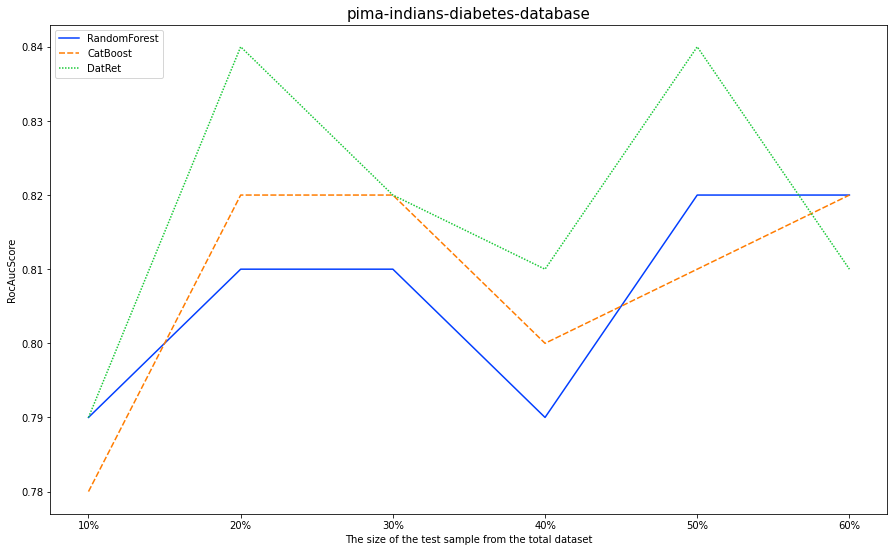

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 9))
plt.title("pima-indians-diabetes-database", fontsize=15)
plt.xlabel("The size of the test sample from the total dataset")
plt.ylabel("RocAucScore")
sns.lineplot(data = dataFrameRocAuc.T, palette="bright")
plt.legend(loc = 'upper left');